<a href="https://colab.research.google.com/github/jpmvbastos/AppliedEconometrics/blob/main/Homework3/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3 - João Pedro Bastos


In [ ]:
import pandas as pd
import numpy as np 
import pandas_datareader.data as pdr
import seaborn as sns
import statsmodels as sm
import statsmodels.api as smapi
import yfinance as yfin
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from arch import arch_model
from arch.univariate import GARCH, EGARCH
sns.set_style('darkgrid')

start='2010-01-01'
end='2020-01-01'

## 2) Replicate the findings of CKLS

To replicate the findings of Chan et al. (1997) I used a MATLAB code adapted from Martin, Hurn and Harris, *Econometric Time Series Modelling: Specification, Estimation and Testing* (2012), and available [here](http://eclr.humanities.manchester.ac.uk/index.php/MATLAB). 

The results are presented below. Notice that when comparing to the the results presented in Table III of Chan et al. (1997), they are closer to the results of Brennan-Schwartz (\alpha = 0.0242, \beta= -0.314, \sigma^2 = 0.1185).
In our results we have a larger \alpha, but identical to Brennan-Schwartz we have a negative and not statistically significant \beta, and a significant \sigma^2 around 0.11 and we cannot reject the null hypothesis that γ = 1, which was their restriction. 








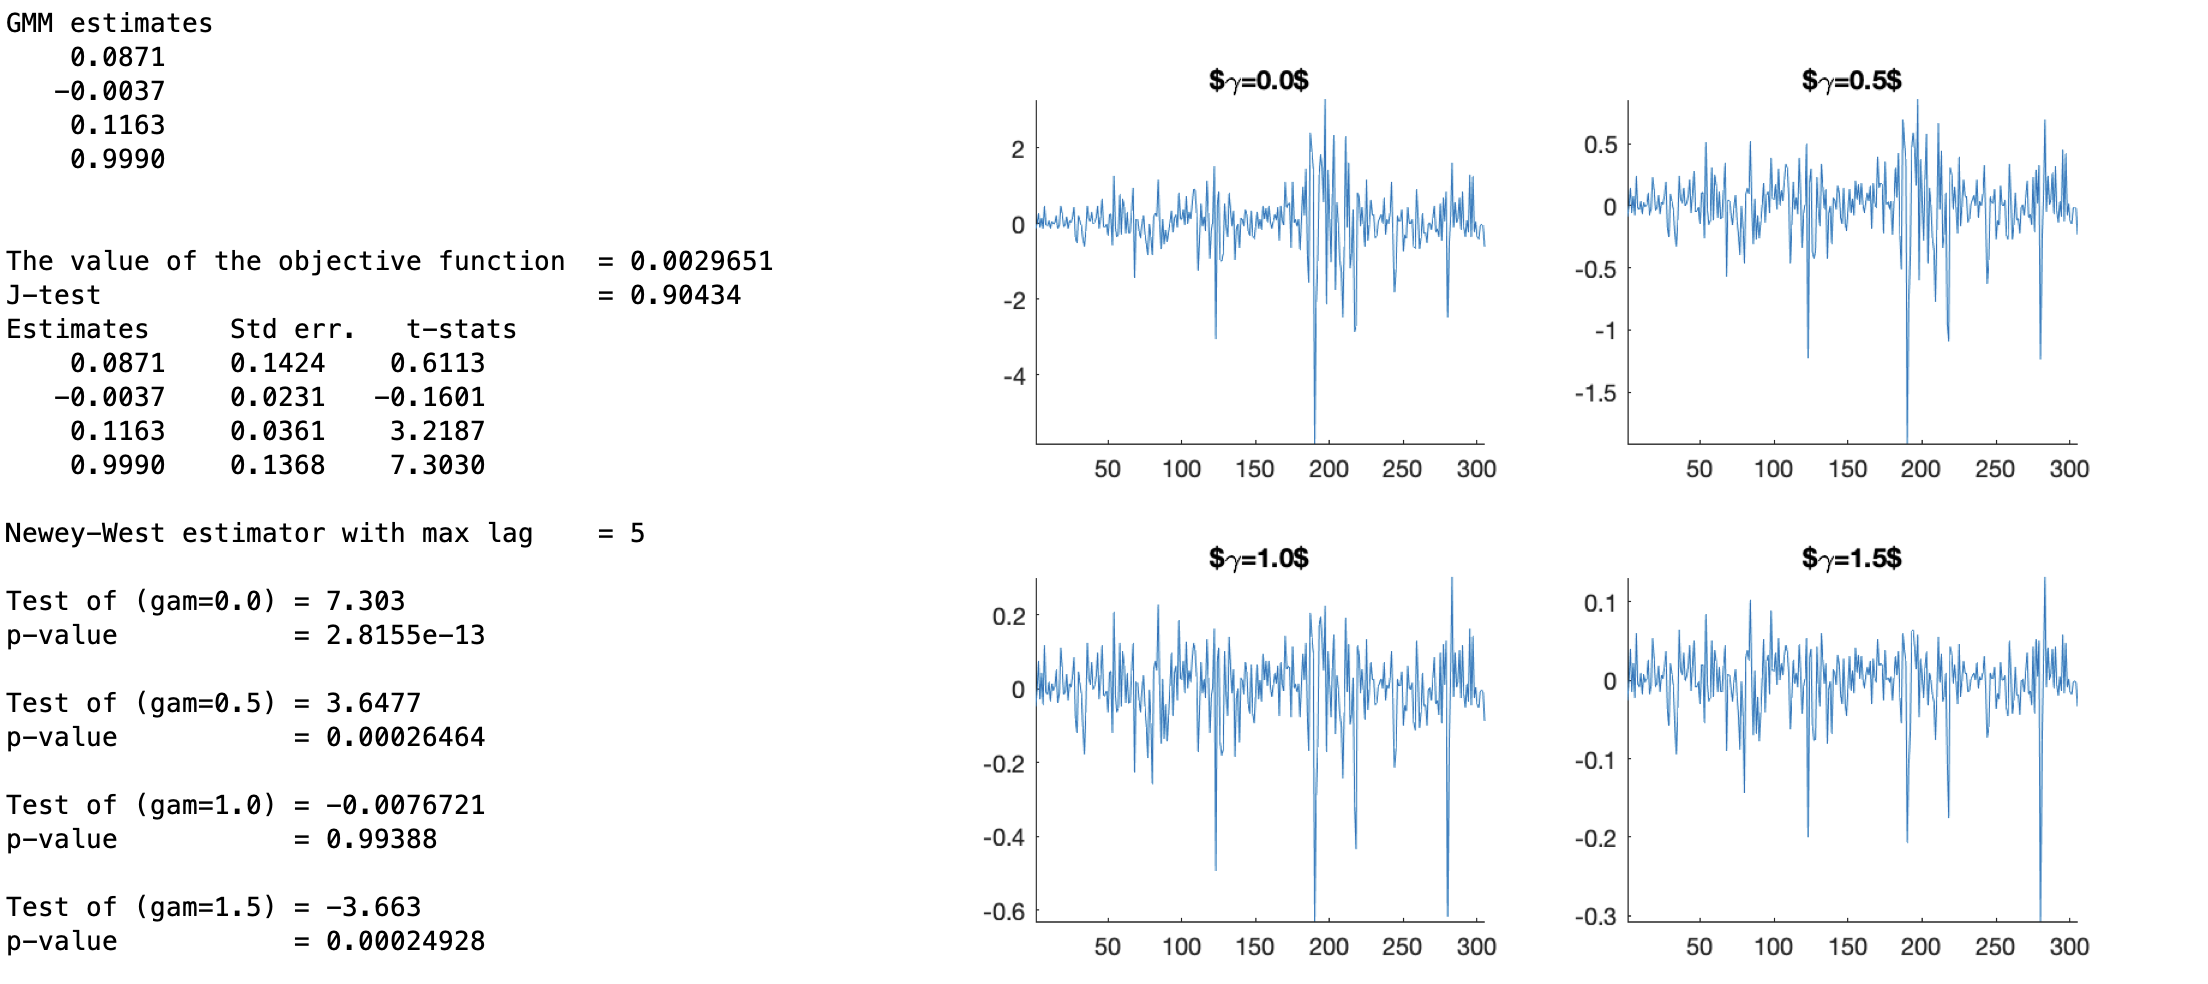

## 3) Download any time series (stock, asset returns, interest rate, or some series from FRED data) and do the following

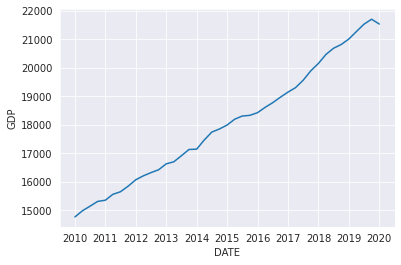

In [ ]:
gdp = pdr.DataReader('GDP', 'fred', start, end)
sns.lineplot(data=gdp, x='DATE', y='GDP')


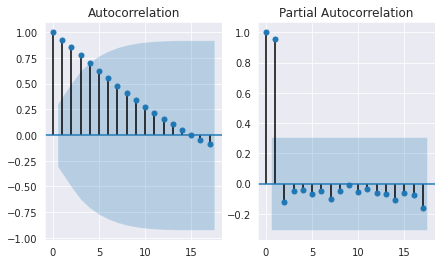

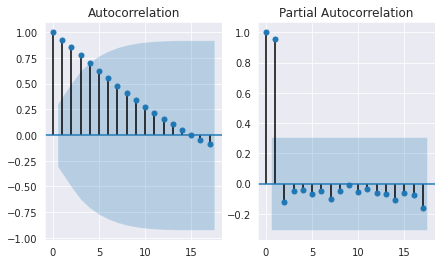

In [ ]:
fig, ax1 = plt.subplots(1,2, figsize=(7,4))
plot_acf(gdp, ax=ax1[0])
plot_pacf(gdp, ax=ax1[1])

In [ ]:
print(f'The p-value for the Augmented Dickey-Fuller test is: {adfuller(gdp)[1]}')

The p-value for the Augmented Dickey-Fuller test is: 0.9835545313067657


As it is suggested from the plots and confirmed by the Dickey-Fuller test, 
our series is non-stationary. In what proceeds, we take the first difference to perform the following estimations. 

In [ ]:
gdpd = gdp.diff()
gdpd = gdpd[1:]

As our 

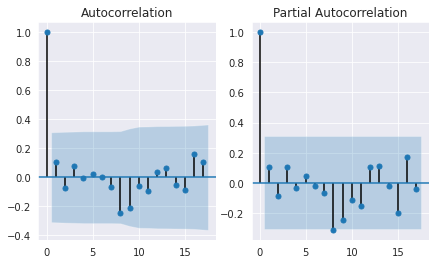

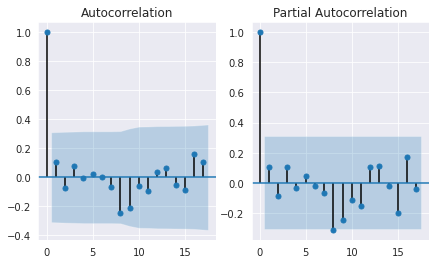

In [ ]:
fig, ax2 = plt.subplots(1,2, figsize=(7,4))
plot_acf(gdpd, ax=ax2[0])
plot_pacf(gdpd, ax=ax2[1])

In [ ]:
print(f'The p-value for the Augmented Dickey-Fuller test is: {adfuller(gdpd)[1]}')

The p-value for the Augmented Dickey-Fuller test is: 0.0005995443562748951


The new Dickey-Fuller test informs that our differentiated series is now stationary. The following exercises estimate an autoregressive model using one to five lags of the series. 

In [ ]:
ar = np.array([])
for i in range(1,6):
  ar = np.append(ar,sm.tsa.ar_model.AutoReg(gdpd, lags=i).fit())


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency

In [ ]:
for i in range(0,5):
  print(ar[i].summary())

                            AutoReg Model Results                             
Dep. Variable:                    GDP   No. Observations:                   40
Model:                     AutoReg(1)   Log Likelihood                -232.348
Method:               Conditional MLE   S.D. of innovations             93.569
Date:                Mon, 05 Dec 2022   AIC                              9.231
Time:                        17:46:07   BIC                              9.359
Sample:                    07-01-2010   HQIC                             9.277
                         - 01-01-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    139.9797     37.657      3.717      0.000      66.173     213.786
GDP.L1         0.1583      0.194      0.815      0.415      -0.222       0.539
                                    Roots           

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132

As it can be seen from the regression outputs, no single coefficient is statistically significant. However, the F-tests presented below indicate they are *jointly* statistically significant at the 1% level. 

In [ ]:
f = np.array([]) 
for i in range(0,5): 
  f = np.append(f, ar[i].f_test(np.identity(len(ar[i].params))))
  print(f[i])


<F test: F=array([[63.30603031]]), p=1.1380165517623865e-12, df_denom=37, df_num=2>
<F test: F=array([[40.83668899]]), p=1.5854422155637233e-11, df_denom=35, df_num=3>
<F test: F=array([[29.59540856]]), p=1.688048732423016e-10, df_denom=33, df_num=4>
<F test: F=array([[24.88840629]]), p=5.296044817352529e-10, df_denom=31, df_num=5>
<F test: F=array([[19.9168634]]), p=4.4293696992777744e-09, df_denom=29, df_num=6>


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb69e876fd0>,
      dtype=object)

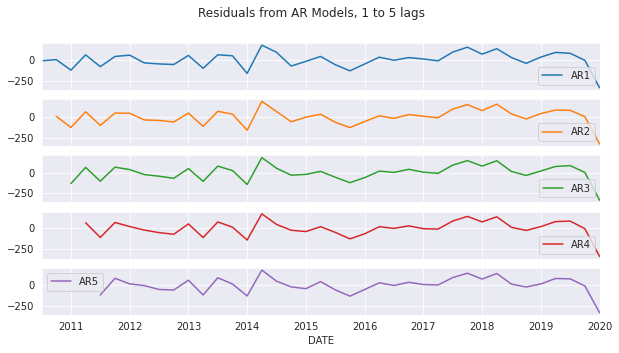

In [ ]:
resids = pd.DataFrame([ar[i].resid for i in range(0,5)]).T.set_axis(['AR'+str(i) for i in range(1,6)],axis='columns')
resids.plot(figsize=(10,5),title="Residuals from AR Models, 1 to 5 lags", subplots=True,sharex=True,legend=True)

In [ ]:
lb = pd.DataFrame([])
labels = np.array(['AR'+str(i) for i in range(1,6)])
labels = np.repeat(labels, 3)
for i in range(0,5):
  lb_df = smapi.stats.acorr_ljungbox(ar[i].resid, lags=[6,12,18], return_df=True)
  lb = pd.concat([lb,lb_df], axis=0)
lb.reset_index().set_axis(labels,axis='index')

,index,lb_stat,lb_pvalue
AR1,6,1.046001,0.983808
AR1,12,6.617146,0.881843
AR1,18,9.298671,0.952417
AR2,6,0.961543,0.987028
AR2,12,7.038194,0.855079
AR2,18,9.222489,0.954364
AR3,6,0.647096,0.995562
AR3,12,6.311951,0.899547
AR3,18,8.244738,0.974766
AR4,6,0.899616,0.989133


In [ ]:
aic = np.array([])
bic = np.array([])
for i in range(0,5): 
  aic = np.append(aic, ar[i].aic)
  bic = np.append(bic, ar[i].bic)

ic = pd.DataFrame([aic,bic])
ic = ic.T.set_axis(['AR'+str(i) for i in range(1,6)], axis='index').set_axis(['AIC','BIC'], axis='columns')
ic

,AIC,BIC
AR1,9.231255,9.359221
AR2,9.301094,9.473472
AR3,9.373322,9.591014
AR4,9.403074,9.666994
AR5,9.476529,9.787598


If we look either at the AIC or BIC criteria, it shows that the AR(1) specification best suits our regression.


In [ ]:
resid = ar[0].resid
het_pvals = np.array([])
for i in (1,2,3,4,5,8,10,12):
    het_pvals = np.append(het_pvals, sm.stats.diagnostic.het_arch(resid, nlags=i)[1])
het_pvals

array([0.93861558, 0.9906159 , 0.99731149, 0.91986706, 0.90954595,
       0.74780689, 0.61578797, 0.63337211])

Above we test if for heteroskedasticity in our AR(1) model using multiple different lags. Regardless of the number of lags, there is no statistically significant sign of heteroskedasticity.

In [40]:
arch = arch_model(gdpd,vol='ARCH').fit(update_freq=5)
print(arch.summary())

Iteration:      5,   Func. Count:     21,   Neg. LLF: 238.37090821070126
Iteration:     10,   Func. Count:     41,   Neg. LLF: 238.36876027753496
Optimization terminated successfully    (Exit mode 0)
            Current function value: 238.36866467251045
            Iterations: 13
            Function evaluations: 52
            Gradient evaluations: 13
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                    GDP   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -238.369
Distribution:                  Normal   AIC:                           482.737
Method:            Maximum Likelihood   BIC:                           487.804
                                        No. Observations:                   40
Date:                Mon, Dec 05 2022   Df Residuals:                       39
Time:       

The α coefficient is not statistically significant, as it is expected given the results for the heteroskedasticity tests performed before. That is, the variance of the residuals in any time $t$ is not explained by the previous' period variance.


In [ ]:
garch = arch_model(gdpd,p=1, q=1, vol='GARCH').fit(update_freq=5)
print(garch.summary())

Iteration:      5,   Func. Count:     27,   Neg. LLF: 237.3584198177965
Iteration:     10,   Func. Count:     52,   Neg. LLF: 237.35563960728507
Iteration:     15,   Func. Count:     77,   Neg. LLF: 237.3555006492749
Iteration:     20,   Func. Count:    102,   Neg. LLF: 237.35428506755645
Iteration:     25,   Func. Count:    127,   Neg. LLF: 237.14255953559322
Iteration:     30,   Func. Count:    152,   Neg. LLF: 236.47591230070356
Optimization terminated successfully    (Exit mode 0)
            Current function value: 236.4758177155585
            Iterations: 33
            Function evaluations: 166
            Gradient evaluations: 33
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                    GDP   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -236.476
Distribution:                  Normal 

The GARCH model is a generalization in the sense that not only it allows for the volatility to be explained by the previous period (α coefficient) but also includes a moving-average term (given by the β coefficient) that is able to capture changes in the level or volatility over time. Taken together, it shows how past volatility affects the current volatility (α) and how long does it take for this shock to disappear (β). 

As in the ARCH model, the conditional volatility is not explained by the variance of the previous period (i.e. the 𝞪 coefficient is not significant). 
A large β coefficient in our case suggests that any shock in volatility will persist for a long time. 

However, to understand this results is imperative to consider both taken together. While β = 1 implies a shock would persist forever, the α = 0 suggests that in reality current volatility is not affected by new information. That is, while the "effect" persists, the "effect" is in reality zero."

In [51]:
egarch = arch_model(gdpd,p=2, o=1, q=2, vol='EGARCH',rescale=True).fit(update_freq=10)
print(egarch.summary())

Iteration:     10,   Func. Count:    100,   Neg. LLF: 13578282.002847867
Iteration:     20,   Func. Count:    192,   Neg. LLF: 236.7255375483444
Iteration:     30,   Func. Count:    291,   Neg. LLF: 6269100.31967424
Iteration:     40,   Func. Count:    444,   Neg. LLF: 368.8788040326484
Optimization terminated successfully    (Exit mode 0)
            Current function value: 229.19849284215496
            Iterations: 42
            Function evaluations: 467
            Gradient evaluations: 41
                     Constant Mean - EGARCH Model Results                     
Dep. Variable:                    GDP   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -229.198
Distribution:                  Normal   AIC:                           472.397
Method:            Maximum Likelihood   BIC:                           484.219
                           

The previous ARCH and GARCH models assume that any innovation of the same size will generate the same expected variance. Only the size of the innovation matters, implying that good and bad news are all alike. However, often unexpected bad news generate more uncertainty and perhaps fear than unantecipated good news. EGARCH allows for good and bad news to have assymetric effects on the volatility of ensuing periods. Because the γ coefficient is statistically significant, there is evidence of assymetric effects of innovation. 

Note: I estimated EGARCH(2,1,2) instead of (1,1,1) as in the previous models to be able to achieve convergence.

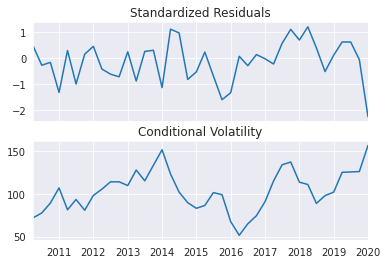

In [41]:
fig = egarch.plot()

In [ ]:
tickers= ['AAPL', 'IBM', '^GSPC', '^IRX']
start_date='2000-01-01'
end_date='2020-11-01'

data = yfin.download(tickers, start_date, end_date)['Adj Close']
data = data.apply(lambda x: 100*x.pct_change().dropna()) # Make it stationary
data.head()

[*********************100%***********************]  4 of 4 completed


,AAPL,IBM,^GSPC,^IRX
Date,,,,
2000-01-04,-8.430998,-3.394434,-3.834467,0.000000
2000-01-05,1.463315,3.513704,0.192218,0.000000
2000-01-06,-8.653839,-1.724149,0.095568,-0.569264
2000-01-07,4.736912,-0.438560,2.709040,-0.381679
2000-01-10,-1.758799,3.964719,1.118997,0.191575


In [ ]:
adfuller_pval = np.array([])
for column in data.columns:
  adfuller_pval = np.append(adfuller_pval, adfuller(data[column])[1])
adfuller_pval

array([3.94543811e-29, 8.15144994e-30, 1.33349996e-25, 3.69578269e-16])

The Augmented Dickey-Fuller test shows that all series are stationary.


In [ ]:
# Calculate the excess return for each stock
er = pd.DataFrame([])
er['r_AAPL'] = data.AAPL - data['^IRX']
er['r_IBM'] = data.IBM - data['^IRX']
er['r_mkt'] = data['^GSPC'] - data['^IRX']

In [ ]:
var = sm.tsa.api.VAR(er)
var.select_order(6).summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


,AIC,BIC,FPE,HQIC
0,9.623,9.626*,1.510e+04,9.624
1,9.620,9.635,1.506e+04,9.625
2,9.614,9.640,1.497e+04,9.623
3,9.614,9.652,1.498e+04,9.627
4,9.614,9.663,1.497e+04,9.631
5,9.601*,9.661,1.477e+04*,9.622*
6,9.602,9.673,1.479e+04,9.627


The results informed by AIC and BIC are contradictory. AIC suggests the 5 lags model as the best fit whereas the BIC criterium suggests the single lag model as the best one. This is likely due to the fact that BIC penalizes additional variables (in our case, more lags) more heavily. 

However, the FPE and HQIC criteria also suggests the 5-lag model as the best fit. I will proceed with 5 lags.

In [ ]:
var.fit(5).summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 28, Nov, 2022
Time:                     15:46:00
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    9.66162
Nobs:                     5236.00    HQIC:                   9.62249
Log likelihood:          -47377.3    FPE:                    14786.2
AIC:                      9.60145    Det(Omega_mle):         14651.5
--------------------------------------------------------------------
Results for equation r_AAPL
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const            -3.125702         0.647403           -4.828           0.000
L1.r_AAPL        -0.631020         0.298898           -2.111           0.035
L1.r_IBM         -0.108763         0.509975           -0.213           0.83